In [17]:
import os

import kagglehub
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split

In [449]:
# path_to_kaggle_data = Path(kagglehub.dataset_download("alexattia/the-simpsons-characters-dataset"))
# path_to_dataset = Path(os.path.join(path_to_kaggle_data, 'simpsons_dataset/simpsons_dataset'))

path_to_dataset = Path('/home/ilya/Documents/Classification-of-the-Simpsons/simpsons dataset/dataset')
# path_to_dataset = Path('/home/i.karakulin/Classification-of-the-Simpsons/simpsons dataset/data/dataset')

train_dir = '/home/ilya/Documents/Classification-of-the-Simpsons/simpsons dataset/train'
val_dir = '/home/ilya/Documents/Classification-of-the-Simpsons/simpsons dataset/val'


In [4]:
simpsons_count = dict()

In [5]:
def check_count_simpsons(path):
    for simpson in os.listdir(path):
        simpsons_count[simpson] = len(os.listdir(os.path.join(path, simpson)))

    plt.figure(figsize=(17, 10))
    plt.barh(simpsons_count.keys(), simpsons_count.values(), color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Simpsons')
    plt.tight_layout()
    plt.show()

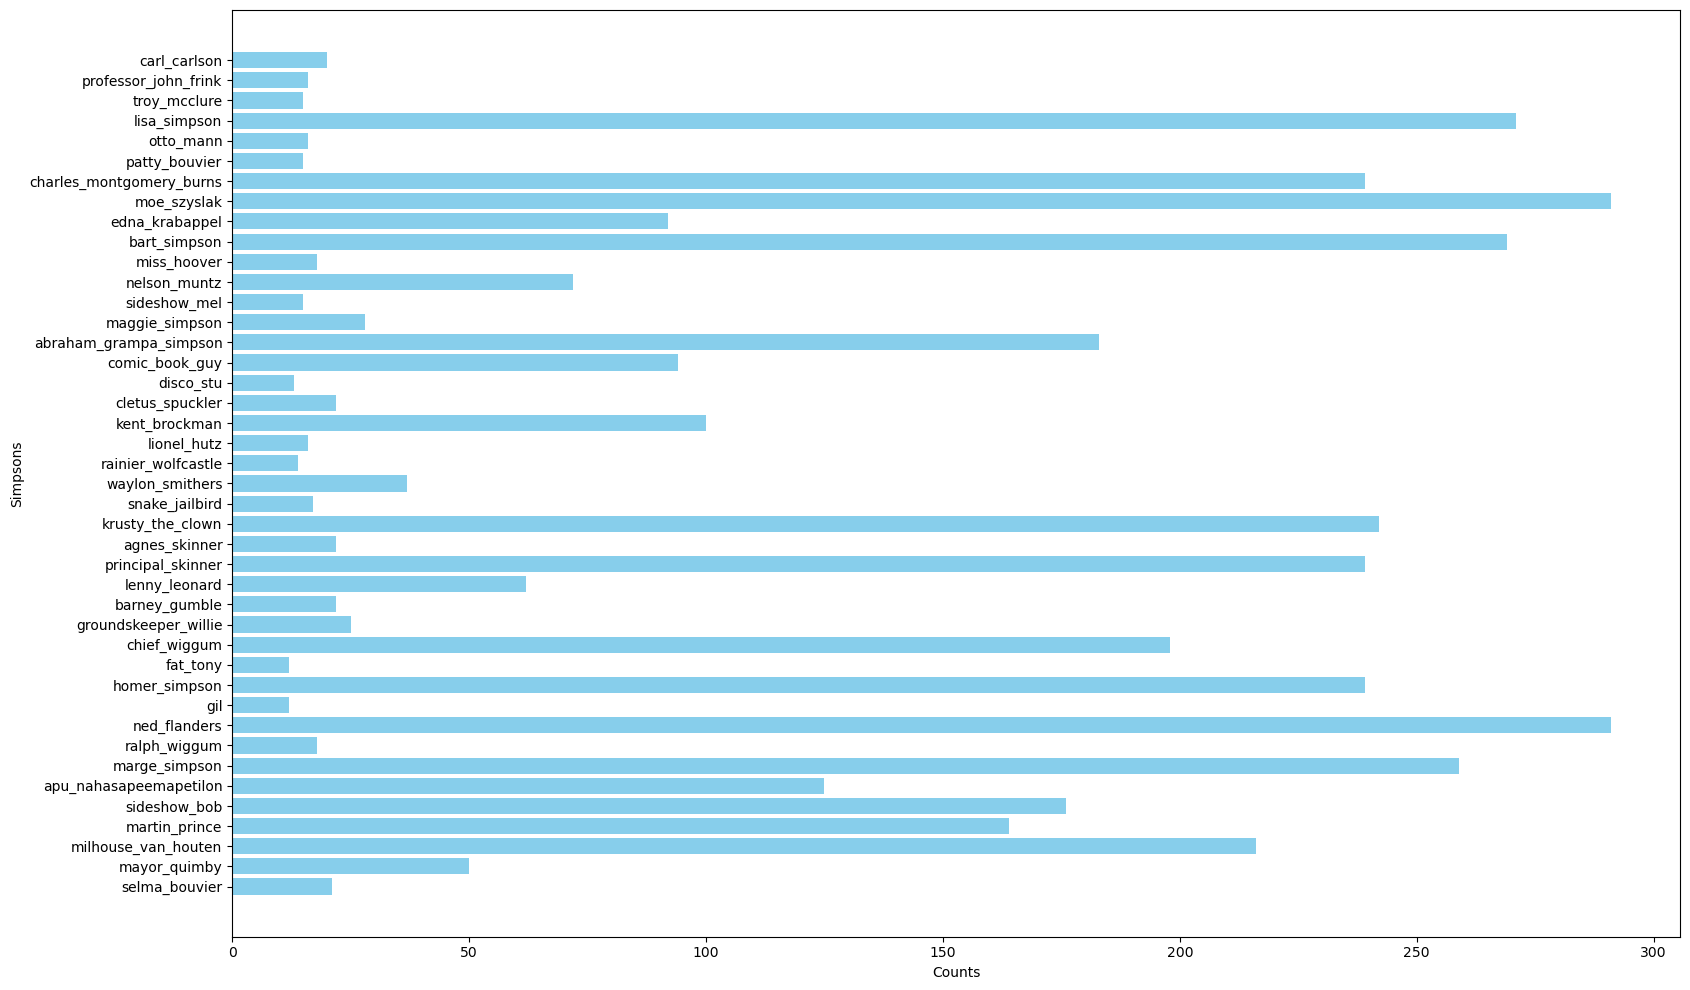

In [459]:
check_count_simpsons(val_dir)

In [ ]:
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

# test_size = 0.2
# random_state = 42

# for class_name in os.listdir(path_to_dataset):
#     class_path = os.path.join(path_to_dataset, class_name)
    

#     if not os.path.isdir(class_path):
#         continue
    

#     images = [img for img in os.listdir(class_path) 
#               if os.path.isfile(os.path.join(class_path, img))]
    
#     train_images, val_images = train_test_split(
#         images, 
#         test_size=test_size, 
#         shuffle=True, 
#         random_state=random_state
#     )

#     train_class_dir = os.path.join(train_dir, class_name)
#     val_class_dir = os.path.join(val_dir, class_name)
#     os.makedirs(train_class_dir, exist_ok=True)
#     os.makedirs(val_class_dir, exist_ok=True)
    

#     for img in train_images:
#         src = os.path.join(class_path, img)
#         dst = os.path.join(train_class_dir, img)
#         shutil.copy(src, dst)
        
#     for img in val_images:
#         src = os.path.join(class_path, img)
#         dst = os.path.join(val_class_dir, img)
#         shutil.copy(src, dst)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ilya/Documents/Classification-of-the-Simpsons/simpsons dataset/dataset'

In [24]:
def load_image(path):
    image = Image.open(path)
    image.load()
    
    if image.mode in ('RGBA', 'LA', 'P'):
        image = image.convert('RGB')
    
    return image, image.size

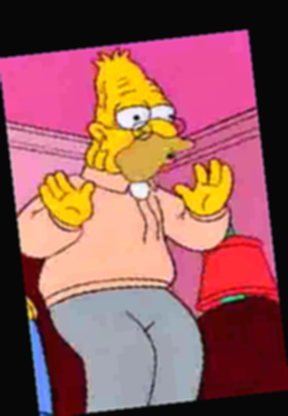

In [455]:
x, size = load_image(f'{train_dir}/abraham_grampa_simpson/pic_0100.jpg')

transforms_pypeline = transforms.Compose([
    transforms.RandomAffine(degrees=30, translate=(0, 0.15), scale=(0.8, 1.2), fill=0),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    transforms.RandomPosterize(bits=5, p=0.5),
    transforms.RandomAdjustSharpness(sharpness_factor=4, p=0.5),
    transforms.GaussianBlur(kernel_size=5, sigma=(0.01, 2.0)),
])

x = transforms_pypeline(x)
x

In [460]:
max_count = max(simpsons_count.values())
max_count

291

In [456]:
for simpson in os.listdir(train_dir):

    path_to_simpson_dir = os.path.join(train_dir, simpson)
    img_list = os.listdir(path_to_simpson_dir)
    count_img_for_cur_simps = simpsons_count[simpson]

    path_list_to_simpson_imgs = []

    for img in img_list:
        path_list_to_simpson_imgs.append(os.path.join(path_to_simpson_dir, img))

    print(simpson, count_img_for_cur_simps, len(list(range(max_count - count_img_for_cur_simps))))
    
    for i in range(max_count - count_img_for_cur_simps):
        path_to_img = path_list_to_simpson_imgs[i % count_img_for_cur_simps]
        
        img, size = load_image(path_to_img)
        
        transform_img = transforms_pypeline(img)
        transform_img.save(str(path_to_img)[:-4] + str(i + count_img_for_cur_simps) + ".jpg", "JPEG")


selma_bouvier 82 1081
mayor_quimby 196 967
milhouse_van_houten 863 300
martin_prince 652 511
sideshow_bob 701 462
apu_nahasapeemapetilon 498 665
marge_simpson 1032 131
ralph_wiggum 71 1092
ned_flanders 1163 0
gil 47 1116
homer_simpson 954 209
fat_tony 46 1117
chief_wiggum 788 375
groundskeeper_willie 96 1067
barney_gumble 84 1079
lenny_leonard 248 915
principal_skinner 955 208
agnes_skinner 84 1079
krusty_the_clown 964 199
snake_jailbird 68 1095
waylon_smithers 144 1019
rainier_wolfcastle 53 1110
lionel_hutz 62 1101
kent_brockman 398 765
cletus_spuckler 85 1078
disco_stu 51 1112
comic_book_guy 375 788
abraham_grampa_simpson 730 433
maggie_simpson 112 1051
sideshow_mel 57 1106
nelson_muntz 286 877
miss_hoover 69 1094
bart_simpson 1073 90
edna_krabappel 365 798
moe_szyslak 1161 2
charles_montgomery_burns 954 209
patty_bouvier 57 1106
otto_mann 64 1099
lisa_simpson 1083 80
troy_mcclure 59 1104
professor_john_frink 60 1103
carl_carlson 78 1085


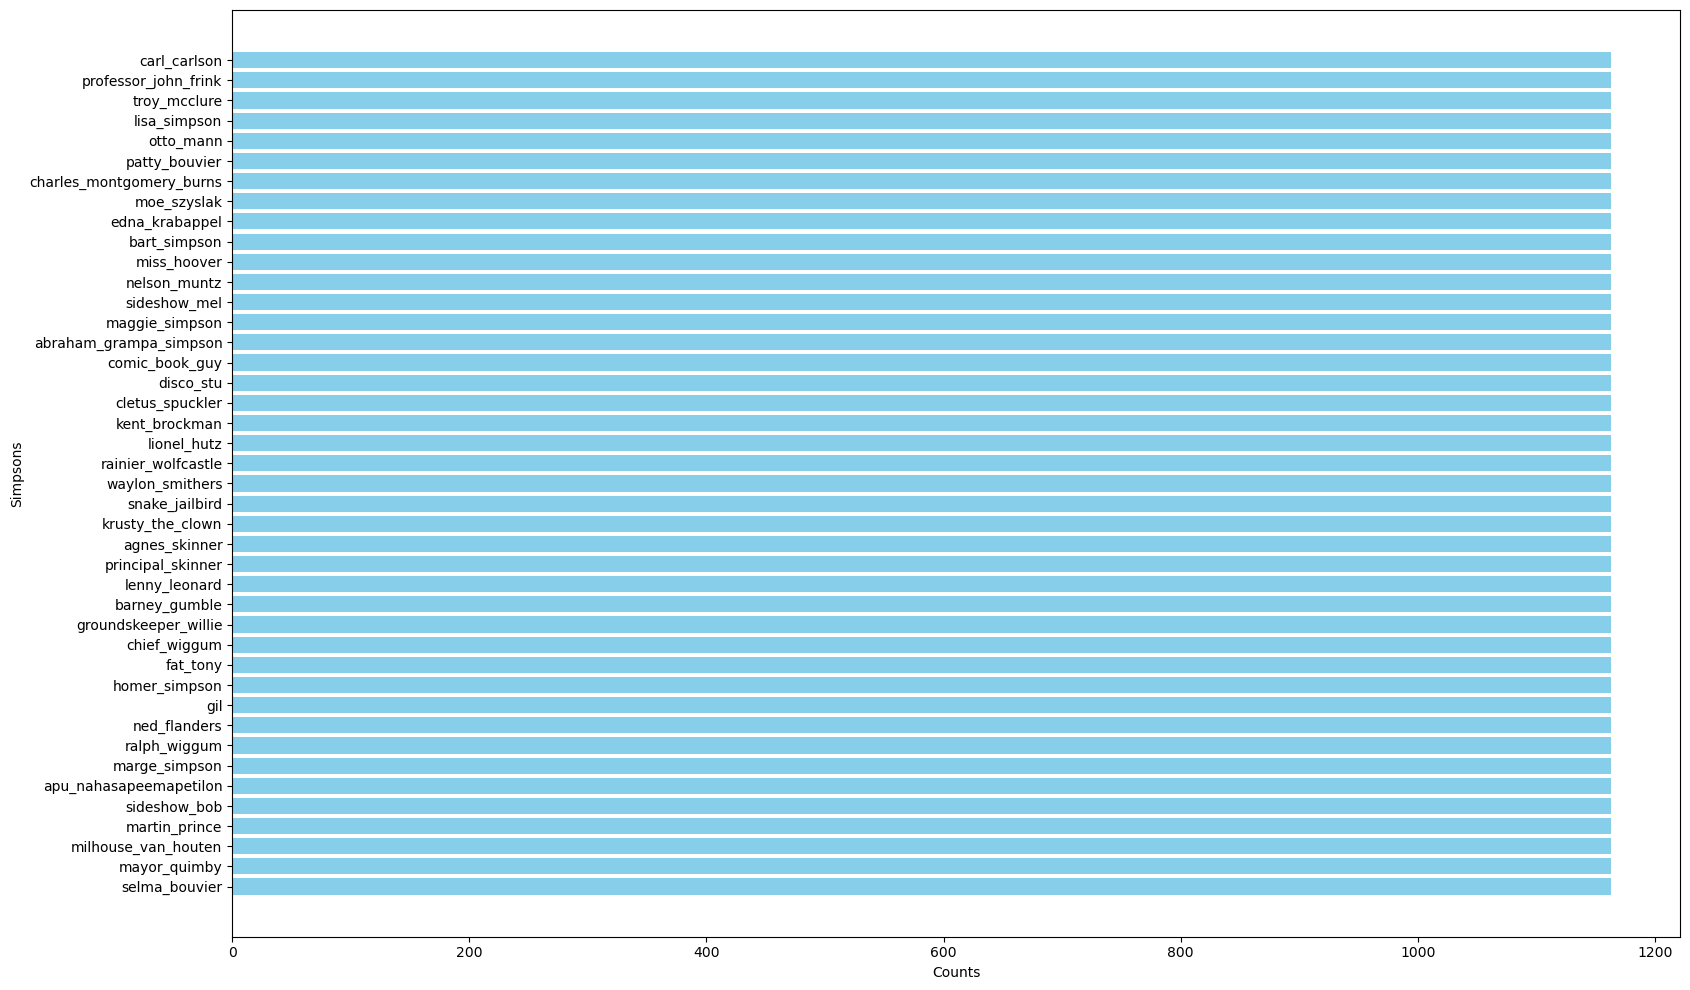

In [457]:
check_count_simpsons(train_dir)

In [461]:
for simpson in os.listdir(val_dir):

    path_to_simpson_dir = os.path.join(val_dir, simpson)
    img_list = os.listdir(path_to_simpson_dir)
    count_img_for_cur_simps = simpsons_count[simpson]

    path_list_to_simpson_imgs = []

    for img in img_list:
        path_list_to_simpson_imgs.append(os.path.join(path_to_simpson_dir, img))

    print(simpson, count_img_for_cur_simps, len(list(range(max_count - count_img_for_cur_simps))))
    
    for i in range(max_count - count_img_for_cur_simps):
        path_to_img = path_list_to_simpson_imgs[i % count_img_for_cur_simps]
        
        img, size = load_image(path_to_img)
        
        transform_img = transforms_pypeline(img)
        transform_img.save(str(path_to_img)[:-4] + str(i + count_img_for_cur_simps) + ".jpg", "JPEG")

selma_bouvier 21 270
mayor_quimby 50 241
milhouse_van_houten 216 75
martin_prince 164 127
sideshow_bob 176 115
apu_nahasapeemapetilon 125 166
marge_simpson 259 32
ralph_wiggum 18 273
ned_flanders 291 0
gil 12 279
homer_simpson 239 52
fat_tony 12 279
chief_wiggum 198 93
groundskeeper_willie 25 266
barney_gumble 22 269
lenny_leonard 62 229
principal_skinner 239 52
agnes_skinner 22 269
krusty_the_clown 242 49
snake_jailbird 17 274
waylon_smithers 37 254
rainier_wolfcastle 14 277
lionel_hutz 16 275
kent_brockman 100 191
cletus_spuckler 22 269
disco_stu 13 278
comic_book_guy 94 197
abraham_grampa_simpson 183 108
maggie_simpson 28 263
sideshow_mel 15 276
nelson_muntz 72 219
miss_hoover 18 273
bart_simpson 269 22
edna_krabappel 92 199
moe_szyslak 291 0
charles_montgomery_burns 239 52
patty_bouvier 15 276
otto_mann 16 275
lisa_simpson 271 20
troy_mcclure 15 276
professor_john_frink 16 275
carl_carlson 20 271


In [ ]:
check_count_simpsons(val_dir)